In [1]:
#Download data from https://www.kaggle.com/kyanyoga/sample-sales-data/data
import pandas as pd

In [2]:
#1. Load into dataframe
df = pd.read_csv("sales_data_sample.csv", encoding = "ISO-8859-1")

In [3]:
#2. show columns 
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [4]:
#3. show first rows 
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
#4. see NAs values
print(df.shape)
df.isnull().sum()

(2823, 25)


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
#5. resolve NAs values
#ADDRESSLINE2 - means that does not have another address - not useful for analysis - drop column
#state - if it is NA means that is not in USA, - fill with empty string 
#POSTALCODE - delete rows that does not have postal code
#TERRITORY - not clear meaning, drop column 
df.drop(["ADDRESSLINE2","TERRITORY"],axis=1,inplace=True)
df["STATE"].fillna("", inplace = True) 
df.dropna(inplace=True)
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [7]:
#6. get the different countries
df["COUNTRY"].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [8]:
#7. drop not important information 
df.drop(["ORDERNUMBER","ORDERLINENUMBER","ORDERDATE", "STATUS", "QTR_ID", "PRODUCTLINE", "MSRP", "PRODUCTCODE", "CUSTOMERNAME", "PHONE", "ADDRESSLINE1", "CITY", "POSTALCODE", "CONTACTLASTNAME", "CONTACTFIRSTNAME"], axis=1,inplace=True)

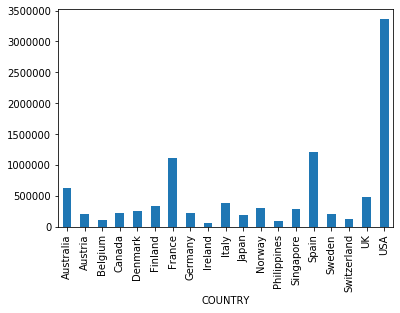

In [9]:
#8. group by country and show sales
df.groupby(['COUNTRY'])['SALES'].sum().plot(kind='bar')

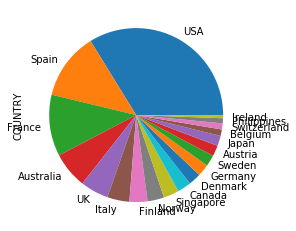

In [10]:
#9. show pie chart to see how many rows are from USA: there are a lot, which makes sense that the sales are more 
df.COUNTRY.value_counts().plot(kind='pie')

In [11]:
#10. transform variables to categorical
df["COUNTRY"] = pd.Categorical(df["COUNTRY"])
print(df.COUNTRY.cat.codes)
df["STATE"] = pd.Categorical(df["STATE"])
print(df.STATE.cat.codes)
df["DEALSIZE"] = pd.Categorical(df["DEALSIZE"])
print(df.DEALSIZE.cat.codes)

0       18
1        6
2        6
3       18
5       18
        ..
2818    14
2819     5
2820    14
2821     6
2822    18
Length: 2747, dtype: int8
0       10
1        0
2        0
3        2
5        2
        ..
2818     0
2819     0
2820     0
2821     0
2822     5
Length: 2747, dtype: int8
0       2
1       2
2       1
3       1
5       1
       ..
2818    2
2819    1
2820    1
2821    2
2822    1
Length: 2747, dtype: int8


In [12]:
#11. remove QUANTITYORDERED column: it can be calculated by SALES/PRICEEACH 
df.drop("QUANTITYORDERED", axis=1,inplace=True)

In [13]:
#12. show cleaned dataframe
df.head()

,PRICEEACH,SALES,MONTH_ID,YEAR_ID,STATE,COUNTRY,DEALSIZE
0,95.70,2871.00,2,2003,NY,USA,Small
1,81.35,2765.90,5,2003,,France,Small
2,94.74,3884.34,7,2003,,France,Medium
3,83.26,3746.70,8,2003,CA,USA,Medium
5,96.66,3479.76,10,2003,CA,USA,Medium


In [14]:
#13. transform categorical to binary variables
categorical_variables = ['STATE','COUNTRY','DEALSIZE']
dummies = pd.get_dummies(df, categorical_variables) 

In [15]:
#14. normalize
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

np_scaled = min_max_scaler.fit_transform(dummies)
df_normalized = pd.DataFrame(np_scaled, columns = dummies.columns)
df_normalized

,PRICEEACH,SALES,MONTH_ID,YEAR_ID,STATE_,STATE_BC,STATE_CA,STATE_CT,STATE_Isle of Wight,STATE_MA,...,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,0.941193,0.175644,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.744940,0.167916,0.363636,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.928063,0.250150,0.545455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.771061,0.240030,0.636364,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.954322,0.220403,0.818182,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1.000000,0.129572,1.000000,0.5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2743,1.000000,0.257074,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2744,1.000000,0.362882,0.181818,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2745,0.483589,0.120143,0.181818,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
#15. save the cleaned dataframe into csv
df_normalized.to_csv('cleaned_data.csv', index=False)